## Pandas Intro

Some examples from [here](https://towardsdatascience.com/40-examples-to-master-pandas-c69d058f434e)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Pandas Data Structures: [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)

Creating Series

In [3]:
obj = pd.Series([17, 12, 54, 16, 20]) # e.g., age
obj

0    17
1    12
2    54
3    16
4    20
dtype: int64

Exporting to Numpy array

In [4]:
obj.values

array([17, 12, 54, 16, 20])

Examining the index object

In [5]:
obj.index

RangeIndex(start=0, stop=5, step=1)

Redefining the index

In [6]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan', 'Fernie'] # let's add the names of the people
obj

Bob       17
Steve     12
Jeff      54
Ryan      16
Fernie    20
dtype: int64

Creating series and passing the inidex as parameter

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

Slicing and accessing elements in the series

In [8]:
obj2['c']

3

In [9]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

Slicing using boolean expressions

In [10]:
obj2[obj2 < 0]

a   -5
dtype: int64

Scalar operations with the series

In [11]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

Creating Series from dictionaries

In [12]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000, 'California': None}
obj3 = pd.Series(sdata)
obj3

Ohio          35000.0
Texas         71000.0
Oregon        16000.0
Utah           5000.0
California        NaN
dtype: float64

isnull() and notnull() methods

In [13]:
pd.isnull(obj3)

Ohio          False
Texas         False
Oregon        False
Utah          False
California     True
dtype: bool

In [14]:
obj3.name = 'Population'
obj3.index.name = 'State'
obj3

State
Ohio          35000.0
Texas         71000.0
Oregon        16000.0
Utah           5000.0
California        NaN
Name: Population, dtype: float64

## Pandas Data Structures: [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)

Creating Dataframe from a dictionary of lists

In [15]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [16]:
print(type(frame))

<class 'pandas.core.frame.DataFrame'>


In [17]:
print(type(frame['state']))

<class 'pandas.core.series.Series'>


Specifying the names of columns & their reordering

In [18]:
d = pd.DataFrame(data, columns=['year', 'state', 'pop'])
d

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


Making a column as the index

In [19]:
d.set_index('year', inplace=True, drop=False)
d

,year,state,pop
year,,,
2000,2000,Ohio,1.5
2001,2001,Ohio,1.7
2002,2002,Ohio,3.6
2001,2001,Nevada,2.4
2002,2002,Nevada,2.9


Dropping a column

In [20]:
d.drop('year', axis=1, inplace=True)
d

,state,pop
year,,
2000,Ohio,1.5
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4
2002,Nevada,2.9


Dropping one or some lines

In [21]:
d.drop(2000, axis=0, inplace=True)   # inplace: bool. If True, do operation inplace
d

,state,pop
year,,
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4
2002,Nevada,2.9


Slicing by column / index

In [22]:
d['pop']

year
2001    1.7
2002    3.6
2001    2.4
2002    2.9
Name: pop, dtype: float64

In [23]:
d.loc[:,'pop']

year
2001    1.7
2002    3.6
2001    2.4
2002    2.9
Name: pop, dtype: float64

In [24]:
d.loc[2001]

,state,pop
year,,
2001,Ohio,1.7
2001,Nevada,2.4


In [25]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

d.loc[[2001,2002], ["state", "pop"]]

,state,pop
year,,
2001,Ohio,1.7
2001,Nevada,2.4
2002,Ohio,3.6
2002,Nevada,2.9


In [26]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

d.iloc[[0,1],[1]]

,pop
year,
2001,1.7
2002,3.6


In [27]:
d.iloc[0:3, 1:2]

,pop
year,
2001,1.7
2002,3.6
2001,2.4


Using alternate notation to access columns as a property

In [28]:
d['state']

year
2001      Ohio
2002      Ohio
2001    Nevada
2002    Nevada
Name: state, dtype: object

In [29]:
d.state

year
2001      Ohio
2002      Ohio
2001    Nevada
2002    Nevada
Name: state, dtype: object

Slicing with boolean conditions (&, |, ==, !=)

In [30]:
d

,state,pop
year,,
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4
2002,Nevada,2.9


In [31]:
d_ = d[(d["state"] != 'Nevada')]
d_

,state,pop
year,,
2001,Ohio,1.7
2002,Ohio,3.6


In [32]:
d_ = d[(d.index != 2002)]
d_

,state,pop
year,,
2001,Ohio,1.7
2001,Nevada,2.4


In [33]:
d_ = d[(d["state"] != 'Nevada') | (d.index != 2002)]
d_

,state,pop
year,,
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4


Creating Dataframes from existing structures

In [34]:
frame2 = pd.DataFrame(data, 
                      columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five']
                     )
frame2['debt'] = np.arange(5.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


In [35]:
frame2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, one to five
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    5 non-null      int64  
 1   state   5 non-null      object 
 2   pop     5 non-null      float64
 3   debt    5 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 200.0+ bytes


In [36]:
frame2.describe()

,year,pop,debt
count,5.00000,5.000000,5.000000
mean,2001.20000,2.420000,2.000000
std,0.83666,0.864292,1.581139
min,2000.00000,1.500000,0.000000
25%,2001.00000,1.700000,1.000000
50%,2001.00000,2.400000,2.000000
75%,2002.00000,2.900000,3.000000
max,2002.00000,3.600000,4.000000


In [37]:
frame2.sort_index(axis=0, ascending=True,)

,year,state,pop,debt
five,2002,Nevada,2.9,4.0
four,2001,Nevada,2.4,3.0
one,2000,Ohio,1.5,0.0
three,2002,Ohio,3.6,2.0
two,2001,Ohio,1.7,1.0


In [38]:
frame2[sorted(frame2.columns)]

,debt,pop,state,year
one,0.0,1.5,Ohio,2000
two,1.0,1.7,Ohio,2001
three,2.0,3.6,Ohio,2002
four,3.0,2.4,Nevada,2001
five,4.0,2.9,Nevada,2002


In [39]:
frame2.sort_values(by='state')

,year,state,pop,debt
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0


Creating new column

In [40]:
frame2['new'] = 13
frame2

,year,state,pop,debt,new
one,2000,Ohio,1.5,0.0,13
two,2001,Ohio,1.7,1.0,13
three,2002,Ohio,3.6,2.0,13
four,2001,Nevada,2.4,3.0,13
five,2002,Nevada,2.9,4.0,13


In [41]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      2.0
new        13
Name: three, dtype: object

In [42]:
frame2.loc['three', 'pop']

3.6

In [43]:
frame2.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      2.0
new        13
Name: three, dtype: object

In [44]:
frame2.iloc[2,1]

'Ohio'

#### Changing a selected value

In [45]:
frame2.loc['one','debt'] = 8
frame2

,year,state,pop,debt,new
one,2000,Ohio,1.5,8.0,13
two,2001,Ohio,1.7,1.0,13
three,2002,Ohio,3.6,2.0,13
four,2001,Nevada,2.4,3.0,13
five,2002,Nevada,2.9,4.0,13


Join Dataframes

In [47]:
indices = frame2.index
data = ["Columbus"]  * 3 + ["Carson City"] * 2
column_names = ["Capital"]

df2 = pd.DataFrame(data, index=indices, columns=column_names)
df2

,Capital
one,Columbus
two,Columbus
three,Columbus
four,Carson City
five,Carson City


In [48]:
frame2.join(df2)

,year,state,pop,debt,new,Capital
one,2000,Ohio,1.5,8.0,13,Columbus
two,2001,Ohio,1.7,1.0,13,Columbus
three,2002,Ohio,3.6,2.0,13,Columbus
four,2001,Nevada,2.4,3.0,13,Carson City
five,2002,Nevada,2.9,4.0,13,Carson City


In [49]:
grupos = frame2.groupby('state')#.mean()
grupos.mean()

,year,pop,debt,new
state,,,,
Nevada,2001.5,2.650000,3.500000,13.0
Ohio,2001.0,2.266667,3.666667,13.0


In [50]:
frame2.drop_duplicates(['state'], inplace=True)
frame2

,year,state,pop,debt,new
one,2000,Ohio,1.5,8.0,13
four,2001,Nevada,2.4,3.0,13


Deleting a column

In [51]:
del frame2['new']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Verifying Python's ordering heuristics

### [Pandas Useful Functions](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html)

In [52]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,8.0
four,2001,Nevada,2.4,3.0


### Transpose

In [53]:
frame2.T

,one,four
year,2000,2001
state,Ohio,Nevada
pop,1.5,2.4
debt,8.0,3.0


In [54]:
frame2.transpose()

,one,four
year,2000,2001
state,Ohio,Nevada
pop,1.5,2.4
debt,8.0,3.0


### [idmin & idmax](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html)

In [55]:
frame2['debt'].idxmax()

'one'

In [56]:
frame2.loc[frame2['debt'].idxmax()]

year     2000
state    Ohio
pop       1.5
debt      8.0
Name: one, dtype: object

In [57]:
max(frame2['debt'])

8.0

In [58]:
frame2['debt'].idxmin()

'four'

In [59]:
frame2.loc[frame2['debt'].idxmin()]

year       2001
state    Nevada
pop         2.4
debt        3.0
Name: four, dtype: object

In [60]:
min(frame2['debt'])

3.0

### [Not Equal - ne](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ne.html)  

In [61]:
df = pd.DataFrame()
df['x'] = [0,0,0,0,0,0,1,2,3,4,5,6,7]

df['x'].ne(0)

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
Name: x, dtype: bool

### Nsmallest  

In [62]:
df['x'].nsmallest(3)

0    0
1    0
2    0
Name: x, dtype: int64

In [63]:
df.nsmallest(3, 'x')

,x
0,0
1,0
2,0


### Nlargest  

In [64]:
df['x'].nlargest(3)

12    7
11    6
10    5
Name: x, dtype: int64

In [65]:
df.nlargest(3, 'x')

,x
12,7
11,6
10,5


### Is in  

In [66]:
df.isin([0,2]).head(10)

,x
0,True
1,True
2,True
3,True
4,True
5,True
6,False
7,True
8,False
9,False


In [67]:
df[df.isin([0,2])] #.dropna()

,x
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,NaN
7,2.0
8,NaN
9,NaN


In [68]:
df[~df.isin([0,2])].dropna()

,x
6,1.0
8,3.0
9,4.0
10,5.0
11,6.0
12,7.0


In [69]:
# Create a test dataframe
# Untidy dataframe
# x : Subjects
# y : Student names

marks = pd.DataFrame(np.random.randint(0, 100, size = (20,5)), 
                     columns = ['Maths', 'Physics','Chemistry', 'Biology', 'Computer_Science'])

marks['Student'] = ['Student ' + str(i) for i in range(1,21)]
marks['Test'] = np.random.choice(['T1', 'T2', 'T3'], size=len(marks))
marks = marks[['Test','Student','Maths', 'Physics','Chemistry', 'Biology', 'Computer_Science']]

display(marks.head())

,Test,Student,Maths,Physics,Chemistry,Biology,Computer_Science
0,T1,Student 1,89,22,22,29,91
1,T2,Student 2,47,39,77,54,37
2,T2,Student 3,8,79,51,15,59
3,T1,Student 4,4,6,56,9,23
4,T1,Student 5,71,31,77,77,30


### [Agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)

In [70]:
marks[['Maths', 'Physics','Chemistry', 'Biology', 'Computer_Science']].agg(['sum', 'min', 'mean'])

,Maths,Physics,Chemistry,Biology,Computer_Science
sum,855.00,944.0,1057.00,913.00,961.00
min,2.00,5.0,0.00,4.00,0.00
mean,42.75,47.2,52.85,45.65,48.05


### Group By

In [71]:
grouped = marks.groupby('Test')

In [72]:
display(marks)

,Test,Student,Maths,Physics,Chemistry,Biology,Computer_Science
0,T1,Student 1,89,22,22,29,91
1,T2,Student 2,47,39,77,54,37
2,T2,Student 3,8,79,51,15,59
3,T1,Student 4,4,6,56,9,23
4,T1,Student 5,71,31,77,77,30
5,T2,Student 6,61,89,90,95,39
6,T3,Student 7,2,25,89,77,22
7,T3,Student 8,89,63,61,4,76
8,T3,Student 9,8,70,42,21,74
9,T3,Student 10,57,15,64,48,20


In [73]:
for group in grouped:
    print(group[0])
    display(group[1])

T1


,Test,Student,Maths,Physics,Chemistry,Biology,Computer_Science
0,T1,Student 1,89,22,22,29,91
3,T1,Student 4,4,6,56,9,23
4,T1,Student 5,71,31,77,77,30
10,T1,Student 11,14,48,0,48,56
14,T1,Student 15,63,90,54,85,85
16,T1,Student 17,8,13,54,12,14
17,T1,Student 18,69,58,0,17,19
18,T1,Student 19,72,6,64,86,0
19,T1,Student 20,17,44,38,34,35


T2


,Test,Student,Maths,Physics,Chemistry,Biology,Computer_Science
1,T2,Student 2,47,39,77,54,37
2,T2,Student 3,8,79,51,15,59
5,T2,Student 6,61,89,90,95,39
11,T2,Student 12,3,5,74,88,65
12,T2,Student 13,38,58,74,49,68
15,T2,Student 16,99,99,30,7,95


T3


,Test,Student,Maths,Physics,Chemistry,Biology,Computer_Science
6,T3,Student 7,2,25,89,77,22
7,T3,Student 8,89,63,61,4,76
8,T3,Student 9,8,70,42,21,74
9,T3,Student 10,57,15,64,48,20
13,T3,Student 14,36,84,40,58,53


In [74]:
grouped['Maths'].mean()

Test
T1    45.222222
T2    42.666667
T3    38.400000
Name: Maths, dtype: float64

In [75]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

grouped2 = grouped.agg({"Student": "nunique"})
grouped2 = grouped2.reset_index()
print(grouped2)

  Test  Student
0   T1        9
1   T2        6
2   T3        5


Plots

In [77]:
marks

,Test,Student,Maths,Physics,Chemistry,Biology,Computer_Science
0,T1,Student 1,89,22,22,29,91
1,T2,Student 2,47,39,77,54,37
2,T2,Student 3,8,79,51,15,59
3,T1,Student 4,4,6,56,9,23
4,T1,Student 5,71,31,77,77,30
5,T2,Student 6,61,89,90,95,39
6,T3,Student 7,2,25,89,77,22
7,T3,Student 8,89,63,61,4,76
8,T3,Student 9,8,70,42,21,74
9,T3,Student 10,57,15,64,48,20


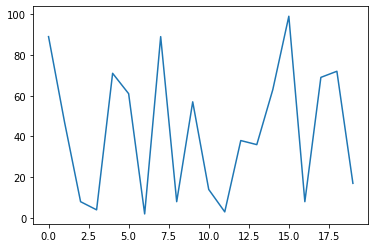

In [78]:
marks['Maths'].plot()